# F1 Qualifying vs Race Data Analysis

#### The following data analysis looks to compare 2 drivers, Max Verstappen (VER) and Oscar Piastri (PIA) across 2 races; mainly, Saudi Arabia, widely considered the fastest track on the F1 calendar, and Miami a track with very fast straights and very slow corners.

## This exercise will aim to look the following 5 areas:

### 1. Top-speed vs. average-speed

Question: Which driver hits a higher maximum speed on the straights, and which sustains a higher average speed over the whole lap?

Hypothesis: On their fastest laps, Verstappen will have a higher peak speed than Piastri (thanks to slipstream/DRS), but Piastri may edge him on average speed by carrying more corner momentum.
___
### 2. Corner entry & exit performance
Question: At key braking zones (e.g. Turns 1, 11 or 17), who brakes later or harder, and who carries more speed out of the corner?

Hypothesis: Verstappen will show sharper (later) braking peaks but Piastri will have a smoother throttle-to-brake transition and better exit speed in low-speed corners.
___
### 3. Throttle application style
Question: How do the throttle-percentage traces differ through corner exits? Does one driver “bury” the throttle earlier or more abruptly?

Hypothesis: Piastri will exhibit a more gradual ramp-up of throttle (for better traction), whereas Verstappen’s trace will spike more quickly toward 100 %.
___
### 4. Brake pressure/intensity comparison
Question: What do the brake-pressure traces tell us about each driver’s braking style—longer, lighter braking vs. shorter, heavier braking?

Hypothesis: Verstappen, with his experience, will show shorter braking distances and higher peak brake pressures; Piastri may brake earlier and more gently.
___
### 5. Qualifying vs. Race fastest laps
Question: How does a driver’s fastest qualifying lap telemetry differ from their fastest race lap?

Hypotheses: Race fastest lap will have a noticeably lower top speed (due to fuel) and a more conservative throttle map. Brake pressures in race trim will be lower and entries slightly earlier (for tire preservation).

In [223]:
import fastf1 as ff1
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [224]:
#enable fastf1 cache
ff1.Cache.enable_cache('cache')  # Enable caching for faster data retrieval

In [225]:
# Load the session data
quali = ff1.get_session(2025, 'Saudi Arabian Grand Prix', 'Qualifying')

In [226]:
# Load lap data
quali.load(laps=True, telemetry=True)

core           INFO 	Loading data for Saudi Arabian Grand Prix - Qualifying [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '81', '63', '16', '12', '55', '44', '22', '10', '4', '23', '30', '14', '6', '87', '18', '7', '27', '31', '5']


In [227]:
laps = quali.laps

In [228]:
# Get telemetry data for the fastest lap
fastest_ver = laps.pick_drivers('VER').pick_fastest()
fastest_pias = laps.pick_drivers('PIA').pick_fastest()

# Get the speed data
telemetry = fastest.get_telemetry()


In [229]:
#Get laps data for Verstapppen and Piastri
laps_ver = laps.pick_drivers('VER')
laps_pias = laps.pick_drivers('PIA')

In [230]:
#Extract laps data for both drivers
fastest_ver = laps_ver.pick_fastest()
fastest_pias = laps_pias.pick_fastest()

In [231]:
# Get the speed data for both drivers
telemetry_ver = fastest_ver.get_car_data().add_distance()
telemetry_pias = fastest_pias.get_car_data().add_distance()


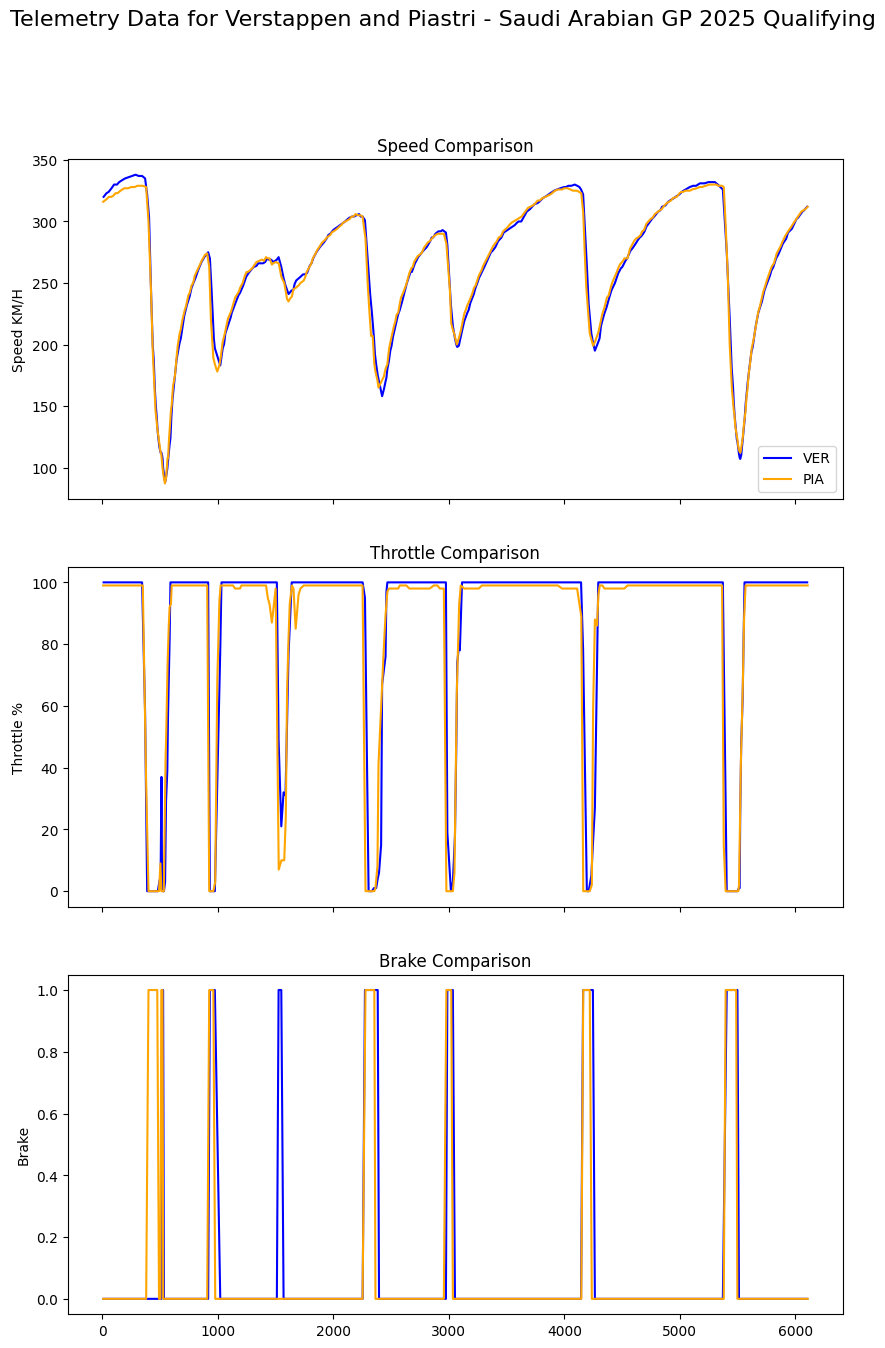

In [232]:
# Plot the speed data for both drivers
fig, ax = plt.subplots(3, 1, figsize=(10, 15), sharex=True)
fig.suptitle('Telemetry Data for Verstappen and Piastri - Saudi Arabian GP 2025 Qualifying', fontsize=16)

ax[0].plot(telemetry_ver['Distance'], telemetry_ver['Speed'], label='VER', color='blue')
ax[0].plot(telemetry_pias['Distance'], telemetry_pias['Speed'], label='PIA', color='orange')
ax[0].set(ylabel='Speed KM/H', title='Speed Comparison')
ax[0].legend(loc='lower right')

ax[1].plot(telemetry_ver['Distance'], telemetry_ver['Throttle'], label='VER', color='blue')
ax[1].plot(telemetry_pias['Distance'], telemetry_pias['Throttle'], label='PIA', color='orange')
ax[1].set(ylabel='Throttle %', title='Throttle Comparison')

ax[2].plot(telemetry_ver['Distance'], telemetry_ver['Brake'], label='VER', color='blue')
ax[2].plot(telemetry_pias['Distance'], telemetry_pias['Brake'], label='PIA', color='orange')
ax[2].set(ylabel='Brake', title='Brake Comparison')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()

plt.show()

In [247]:
ff1.Cache.enable_cache('cache/')

In [248]:
race = ff1.get_session(2025, 'Saudi Arabia', 'R')
race.load(laps=True, telemetry=True)

core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['81', '1', '16', '4', '63', '12', '44', '55', '23', '6', '14', '30', '87', '31', '27', '18', '7', '5', '22', '10']


In [249]:
laps = race.laps

In [250]:
laps_ver = laps.pick_drivers('VER')
laps_pias = laps.pick_drivers('PIA')

In [ ]:
fastest_ver = laps_ver.pick_fastest()
fastest_pias = laps_pias.pick_fastest()

In [254]:
telemetry_ver = fastest_ver.get_telemetry().add_distance()
telemetry_pias = fastest_pias.get_telemetry().add_distance()

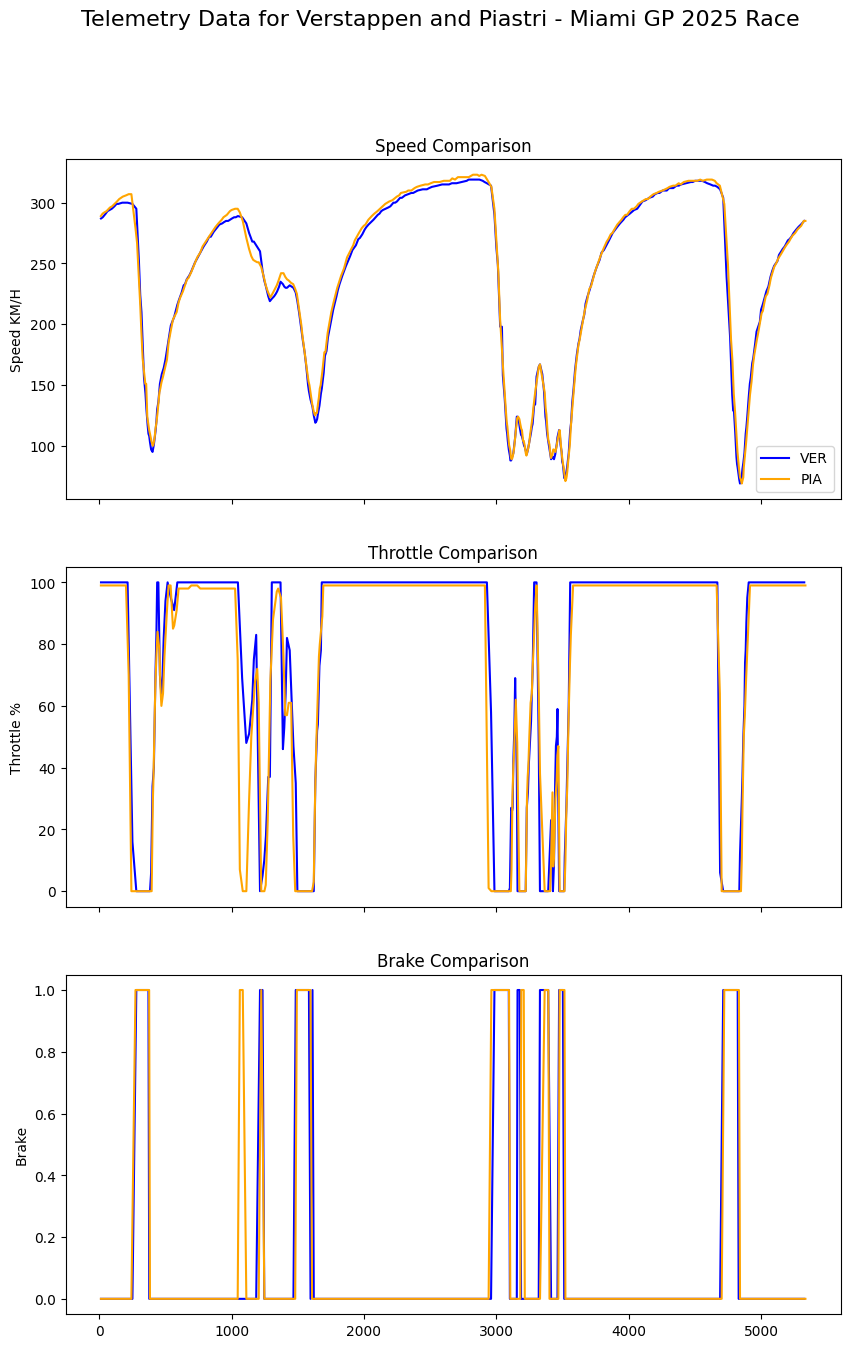

In [253]:
fig, ax = plt.subplots(3, 1, figsize=(10, 15), sharex=True)
fig.suptitle('Telemetry Data for Verstappen and Piastri - Miami GP 2025 Race', fontsize=16)

ax[0].plot(telemetry_ver['Distance'], telemetry_ver['Speed'], label='VER', color='blue')
ax[0].plot(telemetry_pias['Distance'], telemetry_pias['Speed'], label='PIA', color='orange')
ax[0].set(ylabel='Speed KM/H', title='Speed Comparison')
ax[0].legend(loc='lower right')

ax[1].plot(telemetry_ver['Distance'], telemetry_ver['Throttle'], label='VER', color='blue')
ax[1].plot(telemetry_pias['Distance'], telemetry_pias['Throttle'], label='PIA', color='orange')
ax[1].set(ylabel='Throttle %', title='Throttle Comparison')

ax[2].plot(telemetry_ver['Distance'], telemetry_ver['Brake'], label='VER', color='blue')
ax[2].plot(telemetry_pias['Distance'], telemetry_pias['Brake'], label='PIA', color='orange')
ax[2].set(ylabel='Brake', title='Brake Comparison')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()

plt.show()

In [233]:
ff1.Cache.enable_cache('cache/')

In [234]:
quali = ff1.get_session(2025, 'Miami', 'Q')
quali.load(laps=True, telemetry=True)
                        

core           INFO 	Loading data for Miami Grand Prix - Qualifying [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '12', '81', '63', '55', '23', '16', '31', '22', '6', '44', '5', '7', '30', '27', '14', '10', '18', '87']


In [235]:
laps = quali.laps

In [236]:
laps_ver = laps.pick_drivers('VER')
laps_pias = laps.pick_drivers('PIA')


In [237]:
fastest_ver = laps_ver.pick_fastest()
fastest_pias = laps_pias.pick_fastest()

In [238]:
telemetry_ver = fastest_ver.get_car_data().add_distance()
telemetry_pias = fastest_pias.get_car_data().add_distance()

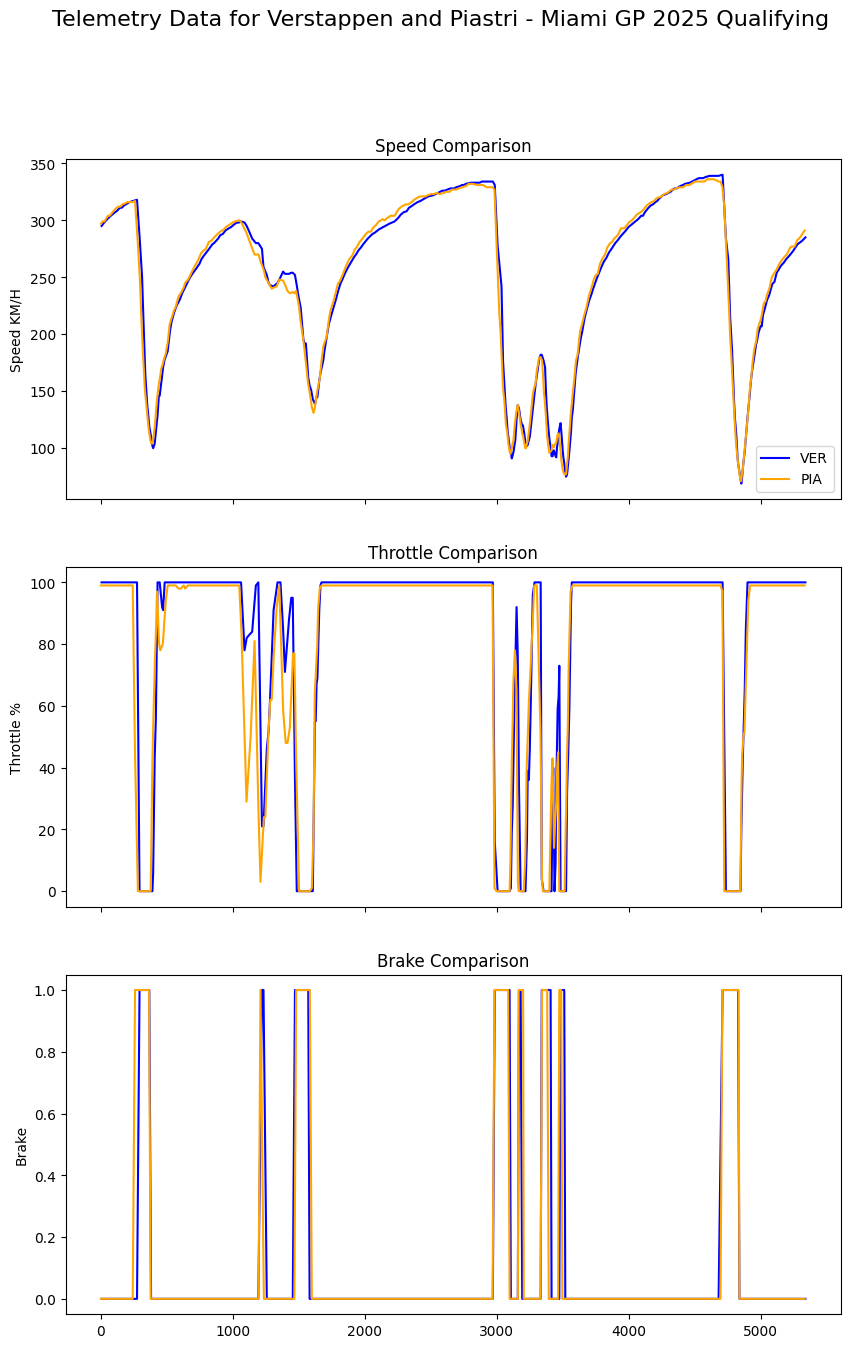

In [239]:
fig, ax = plt.subplots(3, 1, figsize=(10, 15), sharex=True)
fig.suptitle('Telemetry Data for Verstappen and Piastri - Miami GP 2025 Qualifying', fontsize=16)

ax[0].plot(telemetry_ver['Distance'], telemetry_ver['Speed'], label='VER', color='blue')
ax[0].plot(telemetry_pias['Distance'], telemetry_pias['Speed'], label='PIA', color='orange')
ax[0].set(ylabel='Speed KM/H', title='Speed Comparison')
ax[0].legend(loc='lower right')

ax[1].plot(telemetry_ver['Distance'], telemetry_ver['Throttle'], label='VER', color='blue')
ax[1].plot(telemetry_pias['Distance'], telemetry_pias['Throttle'], label='PIA', color='orange')
ax[1].set(ylabel='Throttle %', title='Throttle Comparison')

ax[2].plot(telemetry_ver['Distance'], telemetry_ver['Brake'], label='VER', color='blue')
ax[2].plot(telemetry_pias['Distance'], telemetry_pias['Brake'], label='PIA', color='orange')
ax[2].set(ylabel='Brake', title='Brake Comparison')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()

plt.show()

In [240]:
ff1.Cache.enable_cache('cache/')

In [241]:
race = ff1.get_session(2025, 'Miami', 'R')
race.load(laps=True, telemetry=True)

core           INFO 	Loading data for Miami Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 81 completed the race distance 00:00.036000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['81', '4', '63', '1', '23', '12', '16', '44', '55', '22', '6', '31',

In [242]:
laps = race.laps

In [243]:
laps_ver = laps.pick_drivers('VER')
laps_pias = laps.pick_drivers('PIA')

In [244]:
fastest_ver = laps_ver.pick_fastest()
fastest_pias = laps_pias.pick_fastest()

In [245]:
telemetry_ver = fastest_ver.get_telemetry().add_distance()
telemetry_pias = fastest_pias.get_telemetry().add_distance()

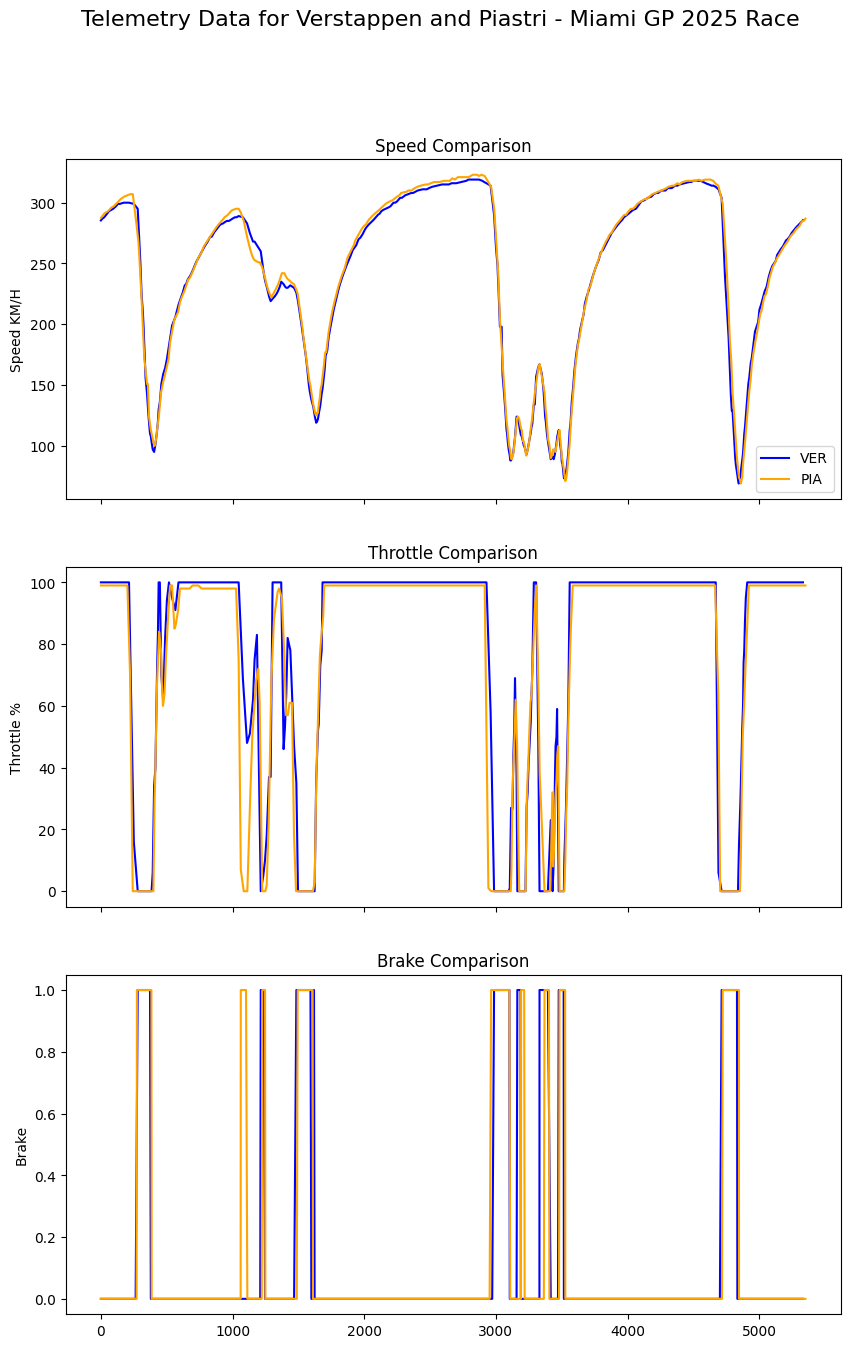

In [246]:
fig, ax = plt.subplots(3, 1, figsize=(10, 15), sharex=True)
fig.suptitle('Telemetry Data for Verstappen and Piastri - Miami GP 2025 Race', fontsize=16)

ax[0].plot(telemetry_ver['Distance'], telemetry_ver['Speed'], label='VER', color='blue')
ax[0].plot(telemetry_pias['Distance'], telemetry_pias['Speed'], label='PIA', color='orange')
ax[0].set(ylabel='Speed KM/H', title='Speed Comparison')
ax[0].legend(loc='lower right')

ax[1].plot(telemetry_ver['Distance'], telemetry_ver['Throttle'], label='VER', color='blue')
ax[1].plot(telemetry_pias['Distance'], telemetry_pias['Throttle'], label='PIA', color='orange')
ax[1].set(ylabel='Throttle %', title='Throttle Comparison')

ax[2].plot(telemetry_ver['Distance'], telemetry_ver['Brake'], label='VER', color='blue')
ax[2].plot(telemetry_pias['Distance'], telemetry_pias['Brake'], label='PIA', color='orange')
ax[2].set(ylabel='Brake', title='Brake Comparison')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()

plt.show()